# Star Wars data

## Desciption of the project
The team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is the best of the series.

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you [download from their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

This project is a data cleaning and exploraiton project. 

## Data description
The data has seveal columns including:
* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

## Data preparation

### Exploring the dataset

In [1]:
#read csv into a dataframe
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
#review column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Preparing data for analysis

In [4]:
#check for nulls
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

In [5]:
#remove rows where respondent ID is NaN
star_wars["RespondentID"]= star_wars["RespondentID"].notnull()

In [6]:
#check number of NaNs after removal
star_wars["RespondentID"].isnull().sum()

0

There are two columns which we will need and which have string values as Yes, No, NaN.
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

To make the analysis easier we can convert them into booleans. 

In [7]:
#convert Yes-No cols to booleans
#create a mapping dictionary 

yes_no = {
    "Yes":True,
    "No":False,
}

#map the dictionary values onto the columns 
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)


In [8]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)          
          

True     552
NaN      351
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

#### Next 6 columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace.`
* `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
* `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
* `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
* `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
* `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi.`

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [10]:
import numpy as np

In [11]:
#create a mapping dictionary
movies = {"Star Wars: Episode I  The Phantom Menace":True,
          "Star Wars: Episode II  Attack of the Clones":True,
          "Star Wars: Episode III  Revenge of the Sith":True,
          "Star Wars: Episode IV  A New Hope":True,
          "Star Wars: Episode V The Empire Strikes Back":True,
          "Star Wars: Episode VI Return of the Jedi":True, 
          np.NaN:False
}


In [12]:
#map the values on all the relevant columns
star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].map(movies)
for column in star_wars.iloc[:,3:9]:
    star_wars[column] = star_wars[column].map(movies)

In [13]:
#check if mapping worked
star_wars["Unnamed: 4"].value_counts()

False    615
True     572
Name: Unnamed: 4, dtype: int64

In [14]:
star_wars["Unnamed: 7"].value_counts()

True     759
False    428
Name: Unnamed: 7, dtype: int64

#### Renaming the columns
We'll rename the columns to better reflect what they represent.

In [15]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [16]:
#create a dictionary of new values
new_names = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
             'Unnamed: 4':'seen_2',
             'Unnamed: 5':'seen_3',
             'Unnamed: 6':'seen_4',
             'Unnamed: 7':'seen_5',
             'Unnamed: 8':'seen_6'
}

In [17]:
star_wars = star_wars.rename(columns=new_names)

#### Cleaning up the ranking columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [18]:
#first row had non numeric data, so we drop it
star_wars = star_wars.drop([0])

#convert values to floats
star_wars[star_wars.columns[9:15]] =star_wars[star_wars.columns[9:15]].astype(float)

In [19]:
#show the list of columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

In [20]:
#create new set of names
names = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
         'Unnamed: 10':'ranking_2',
         'Unnamed: 11':'ranking_3',
         'Unnamed: 12':'ranking_4',
         'Unnamed: 13':'ranking_5',
         'Unnamed: 14':'ranking_6'
}

In [21]:
#rename the columns
star_wars = star_wars.rename(columns=names)

In [22]:
#check if renaming worked
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

# Data Analysis

## Find the highest ranking film

In [35]:
#calculate the mean of each ranking columns
ranking_means = {}

for column in star_wars.columns[9:15]:
    mean = star_wars[column].mean()
    ranking_means[column]=mean

ranking_means

{'ranking_1': 3.7329341317365268,
 'ranking_2': 4.087320574162679,
 'ranking_3': 4.341317365269461,
 'ranking_4': 3.272727272727273,
 'ranking_5': 2.513157894736842,
 'ranking_6': 3.047846889952153}

In [38]:
means = [star_wars[column].mean() for column in star_wars.columns[9:15]]
means

[3.7329341317365268,
 4.087320574162679,
 4.341317365269461,
 3.272727272727273,
 2.513157894736842,
 3.047846889952153]

Rankings are given from 1 to 6, with 6 being the lowest appreciations score.

The highest ranking film from the set is `ranking_5`, that is "Star Wars: Episode V The Empire Strikes Back".

We can represent the ranking means as a bar plot.

In [62]:
import matplotlib.pyplot as plt
from numpy import arange

In [63]:
%matplotlib inline

In [129]:
#function to display charts of means of a df
def means_graph(dataframe):
    
    means = [dataframe[column].mean() for column in dataframe.columns[9:15]]
    ind = np.arange(6)  #x ticks locations for the values
    width = 0.5         #width of the bar

    fig, ax = plt.subplots()

    #plot the values
    graph = ax.bar(ind, means, width)
    
    #style the plot
    ax.set_ylim(0, 5)
    plt.xticks(rotation=45)
    ax.set_xticklabels(dataframe.columns[8:15])
    plt.ylabel('Ranking means')
    plt.title('Star Wars Rankings')

    plt.show()

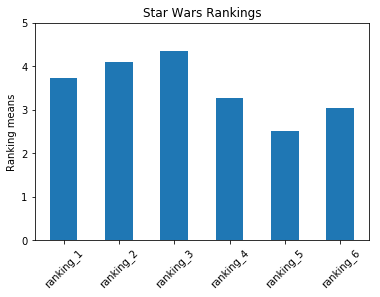

In [130]:
means_graph(star_wars)

**Conclusions:**
The lower ranking the better the film was perceived. The best performing film was "Star Wars: Episode V The Empire Strikes Back". 

The result need to be interpreted considering the design of the survey. The team was biased towards proving a specific hypothesis: the superiority of this particular flm to the others. This starting point might have been reflected in the survey design, distribution, and manner of selecting the participants which in turn could have produced biased answers. 


## Calculating how many people have seen the films

In [72]:
#a funciton to make a bar chart to show numbers of viewers

def sum_viewers_plot(dataframe):
    #calculate the sums
    sum_viewers = [dataframe[col].sum() for col in dataframe.columns[3:9]]

    #create a plot
    ind = np.arange(6)  #x ticks locations for the values
    width = 0.5         #width of the bar

    fig, ax = plt.subplots()

    #plot the values
    graph = ax.bar(ind, sum_viewers, width)

    #style the plot
    ax.set_ylim(0, 800)
    plt.xticks(rotation=45)
    ax.set_xticklabels(dataframe.columns[2:9])
    plt.ylabel('Number of Viewers')
    plt.title('Star Wars Number of Viewers per Film')

    plt.show()

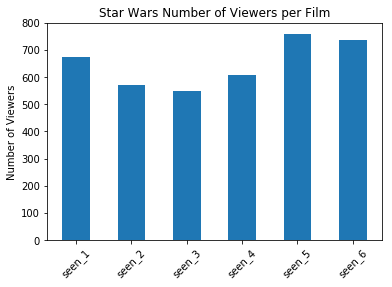

In [73]:
sum_viewers_plot(star_wars)

In [95]:
# function to create a summary df of results of sum & mean sorted by mean rankings

def summary_df(df):
    #create the names of all 'seen' columns
    seen_columns = ["seen_{}".format(i) for i in range(1,7)]
    film_columns = ["film_{}".format(i) for i in range(1,7)]
    #calculate the sums
    sum_viewers = [df[col].sum() for col in seen_columns]
    
    #calculate the means
    means = [df[column].mean() for column in df.columns[9:15]]
    means_sums = pd.DataFrame({"seen": seen_columns,"sum_viewers":sum_viewers,"mean_rankings":means})
    cols = ["seen","mean_rankings", "sum_viewers"]
    means_sums = means_sums.reindex(columns=cols).sort_values(by='mean_rankings')
    means_sums = pd.DataFrame(means_sums)
    #rename the values in the seen column to films
    means_sums['seen'] = (means_sums['seen'].str.replace("seen","film"))
    return means_sums

In [96]:
summary_sw = summary_df(star_wars)
summary_sw

,seen,mean_rankings,sum_viewers
4,film_5,2.513158,758
5,film_6,3.047847,738
3,film_4,3.272727,607
0,film_1,3.732934,673
1,film_2,4.087321,571
2,film_3,4.341317,550


**Conclusions:** 
The highest nuber of viewers have seen episode 5 of Star Wars, and that episode gets the highest ranking. This supports the hypothesis the survey collectors have set out to prove.

There are alternative explanaitons for this result, for example referring to the survey colleciton design. 
Timing. We don't know when respondents were questioned. They might have been questioned soon after watching episode 5, for example the survey might have been distributed to attendees of a fan screening. This would explain why most respondednts have seen this specific film, even though it's one thats in the middle of the trilogy.

It also appears that the fewer viewers the lower the rankings. The correlation here might run the other way, that is, film with low rankings don't get so many viewers.

# Segment-based results

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

* `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
* `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
* `Gender` - `Male` or `Female`

## Star Trek Fans

In [97]:
#filter the dataframe to split between star trek fans and the rest
star_trek_yes = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_trek_no = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

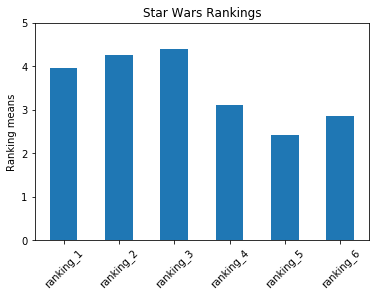

In [131]:
#show mean ranking plot for star trek fans
means_graph(star_trek_yes)

In [132]:
#summary data for Star Trek fans
summary_st_yes = summary_df(star_trek_yes)
summary_st_yes

,seen,mean_rankings,sum_viewers
4,film_5,2.407229,397
5,film_6,2.850602,396
3,film_4,3.110843,342
0,film_1,3.968675,364
1,film_2,4.255422,336
2,film_3,4.403382,322


In [133]:
#summary data for Star Trek not-fans
summary_st_no = summary_df(star_trek_no)
summary_st_no

,seen,mean_rankings,sum_viewers
4,film_5,2.634383,353
5,film_6,3.244552,334
3,film_4,3.433414,258
0,film_1,3.487864,301
1,film_2,3.915254,228
2,film_3,4.278450,221


In [134]:
#combine star trek fans with no fans
trek_fans = pd.merge(left=summary_st_no, right=summary_st_yes, how='inner', on='seen', suffixes=("_not_fans","_fans"))
cols = ["seen","mean_rankings_fans",'mean_rankings_not_fans', "sum_viewers_not_fans","sum_viewers_fans"]
trek_fans = trek_fans.reindex(columns=cols)
trek_fans

,seen,mean_rankings_fans,mean_rankings_not_fans,sum_viewers_not_fans,sum_viewers_fans
0,film_5,2.407229,2.634383,353,397
1,film_6,2.850602,3.244552,334,396
2,film_4,3.110843,3.433414,258,342
3,film_1,3.968675,3.487864,301,364
4,film_2,4.255422,3.915254,228,336
5,film_3,4.403382,4.278450,221,322


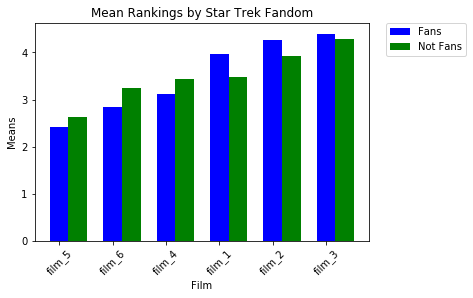

In [135]:
#plot fans vs not fans on a bar chart
fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.35

rects1 = plt.bar(index, trek_fans['mean_rankings_fans'], bar_width, color='b', label='Fans')

rects2 = plt.bar(index + bar_width, trek_fans['mean_rankings_not_fans'], bar_width, color='g', label='Not Fans')
plt.xlabel('Film')
plt.ylabel('Means')
plt.title('Mean Rankings by Star Trek Fandom')

plt.xticks(np.arange(6), trek_fans['seen'], rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

**Conclusions** 
Both audiences both saw Star Wars Episode 5 in higher numbers and ranked the highest by both audiences. 

Interesting difference in perception with regards to films 1-3—the "new Star Wars", where fans rated all of them lower than non fans, especially film 1. 

In contrast, the later part of the series — the "old Star Wars" which was released earlier, chronologically—gets higher rankings from Star Trek fans than no-fans.

A part of the explanation might be the cult-like status of the Episodes 4-6 and Star Trek, which would make both series appealing to a similar audience, brodly described as sci-fi fans. In contrast, those who aren't Star Trek fans, might evaluate all SW films in their own right, rather than as a part of a cult phenomenon. Perhaps this explains why their ratings for episodes 6, 4—both of the old SW — and 1, from the new SW, don't differ a lot.

In [86]:
#compare total stats with values for Star Trek fans
all_plus_st = pd.merge(left=summary_sw, right=summary_st_yes, how='inner', on='seen', suffixes=("_all","_star_trek"))
cols = ["seen","mean_rankings_all",'mean_rankings_star_trek', "sum_viewers_all","sum_viewers_star_trek"]
all_plus_st = all_plus_st.reindex(columns=cols)
all_plus_st

,seen,mean_rankings_all,mean_rankings_star_trek,sum_viewers_all,sum_viewers_star_trek
0,seen_5,2.513158,2.407229,758,397
1,seen_6,3.047847,2.850602,738,396
2,seen_4,3.272727,3.110843,607,342
3,seen_1,3.732934,3.968675,673,364
4,seen_2,4.087321,4.255422,571,336
5,seen_3,4.341317,4.403382,550,322


**Conclusions** Both for all viewers and for just for Star Trek fans, episode 5 was the top ranked film. For both audiences it was also the film that was viewed by the highest numer of viewers.

## Gender differences
We can investigate if the rankings were different for viewers of different genders.

In [137]:
#split the database by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

#create summary dfs
summary_males = summary_df(males)
summary_females = summary_df(females)

In [139]:
#combine two dfs into a one
genders = pd.merge(left=summary_males, right=summary_females, how='inner', on='seen', suffixes=("_males","_females"))
cols = ["seen","mean_rankings_males",'mean_rankings_females', "sum_viewers_males","sum_viewers_females"]
genders = genders.reindex(columns=cols)
genders

,seen,mean_rankings_males,mean_rankings_females,sum_viewers_males,sum_viewers_females
0,film_5,2.458629,2.569270,392,353
1,film_4,2.997636,3.544081,342,255
2,film_6,3.002364,3.078086,387,338
3,film_1,4.037825,3.429293,361,298
4,film_2,4.224586,3.954660,323,237
5,film_3,4.274882,4.418136,317,222


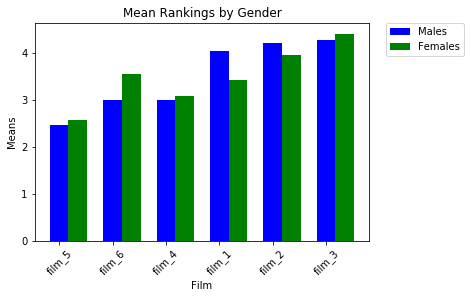

In [141]:
#plot a graph
#plot men's and women's on a bar chart

fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.35

rects1 = plt.bar(index, genders['mean_rankings_males'], bar_width, color='b', label='Males')

rects2 = plt.bar(index + bar_width, genders['mean_rankings_females'], bar_width, color='g', label='Females')

plt.xlabel('Film')
plt.ylabel('Means')
plt.title('Mean Rankings by Gender')
plt.xticks(np.arange(6), trek_fans['seen'], rotation=45)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

**Conclusions** 
With regards to gender the split of mean rankings shows:
* the top film for both gendrs was episode 5
* the least well-ranked was episode 3

* there was a big disparity in rankings of:

-- episode 1, with males giving it much lower scores.

-- episode 6, with females giving it much lower scores.

* the lowest ranking disparity appear in mean rankings for Episodes (in order of dfference): 4, 5, and 3.